# 주식:장기 채권 변동성 역가중 포트폴리오  p155
 - 투자자산 : SPY, IEF, TLT
 - 매수원칙 : 최근 12개월간의 주식과 채권의 변동성 역가중에 따른 매수
 - 매도원칙 : 매월말 리밸런싱

그림 2-22

In [1]:
from settings import *

In [2]:
tickers = ['SPY', 'IEF', 'TLT']
read_df = yf.download(tickers)['Adj Close'].dropna()
read_df.info() #DatetimeIndex: 4899 entries, 2002-07-30 to 2022-01-11

[*********************100%***********************]  3 of 3 completed
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4911 entries, 2002-07-30 to 2022-01-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IEF     4911 non-null   float64
 1   SPY     4911 non-null   float64
 2   TLT     4911 non-null   float64
dtypes: float64(3)
memory usage: 153.5 KB


In [3]:
data = read_df.copy()
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4911 entries, 2002-07-30 to 2022-01-28
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   IEF     4911 non-null   float64
 1   SPY     4911 non-null   float64
 2   TLT     4911 non-null   float64
dtypes: float64(3)
memory usage: 153.5 KB


In [4]:
start = '2003-7-30'

In [5]:
주식채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)
변동성역가중 = bt.Strategy('변동성역가중',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighInvVol(lookback=pd.DateOffset(years=1), lag=pd.DateOffset(days=1)),
        bt.algos.PrintTempData(),
        bt.algos.Rebalance()

    ])

In [6]:
bt_spy = long_only_ew(data, ['SPY'], 'SPY', initial_capital=100000000)
bt_ief = long_only_ew(data, ['IEF'], 'IEF', initial_capital=100000000)
bt_tlt = long_only_ew(data, ['TLT'], 'TLT', initial_capital=100000000)

In [7]:
bt_test10 = bt.Backtest(주식채권혼합전략, data[['SPY', 'IEF']], name='1:1(10년국채)', initial_capital=100000000)
bt_test20 = bt.Backtest(주식채권혼합전략, data[['SPY', 'TLT']], name='1:1(20년국채)', initial_capital=100000000)

In [8]:
bt_invvol10 = bt.Backtest(변동성역가중, data[['SPY', 'IEF']], name='10년국채(변동성역가중)', initial_capital=100000000)
bt_invvol20 = bt.Backtest(변동성역가중, data[['SPY', 'TLT']], name='20년국채(변동성역가중)', initial_capital=100000000)

In [9]:
r10 = bt.run(bt_invvol10)
r20 = bt.run(bt_invvol20)
r20_assets = bt.run(bt_spy)
r_all = bt.run(bt_spy, bt_invvol10, bt_invvol20)

2003-07-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.239
IEF   0.761
dtype: float64}
2003-08-29 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.253
IEF   0.747
dtype: float64}
2003-09-30 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.263
IEF   0.737
dtype: float64}
2003-10-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.292
IEF   0.708
dtype: float64}
2003-11-28 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.297
IEF   0.703
dtype: float64}
2003-12-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.315
IEF   0.685
dtype: float64}
2004-01-30 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.327
IEF   0.673
dtype: float64}
2004-02-27 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.340
IEF   0.660
dtype: float64}
2004-03-31 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.359
IEF   0.641
dtype: float64}
2004-04-30 00:00:00
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.380
IEF   0.620
dtype: float64}


In [10]:
# r20.backtests['1:1:1(20년국채)'].stats.display()

In [11]:
r_all.set_date_range(start)
r_all.display()

Stat                 SPY         10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  ------------------------  ------------------------
Start                2003-07-30  2003-07-30                2003-07-30
End                  2022-01-28  2022-01-28                2022-01-28
Risk-free rate       0.00%       0.00%                     0.00%

Total Return         538.83%     201.71%                   381.26%
Daily Sharpe         0.63        1.15                      1.05
Daily Sortino        0.97        1.89                      1.69
CAGR                 10.54%      6.15%                     8.86%
Max Drawdown         -55.19%     -11.56%                   -17.45%
Calmar Ratio         0.19        0.53                      0.51

MTD                  -6.95%      -3.52%                    -5.24%
3m                   -3.23%      -1.90%                    -2.67%
6m                   1.39%       -2.46%                    -1.04%
YTD                  -6.95%      -3.52%                 

In [12]:
r_all.prices.resample('M').last().to_drawdown_series().describe()

,SPY,10년국채(변동성역가중),20년국채(변동성역가중)
count,223.000,223.000,223.000
mean,-0.060,-0.008,-0.018
std,0.104,0.014,0.029
min,-0.508,-0.088,-0.155
25%,-0.068,-0.011,-0.028
50%,-0.010,-0.000,-0.005
75%,0.000,0.000,0.000
max,0.000,0.000,0.000


## 그림 2.22

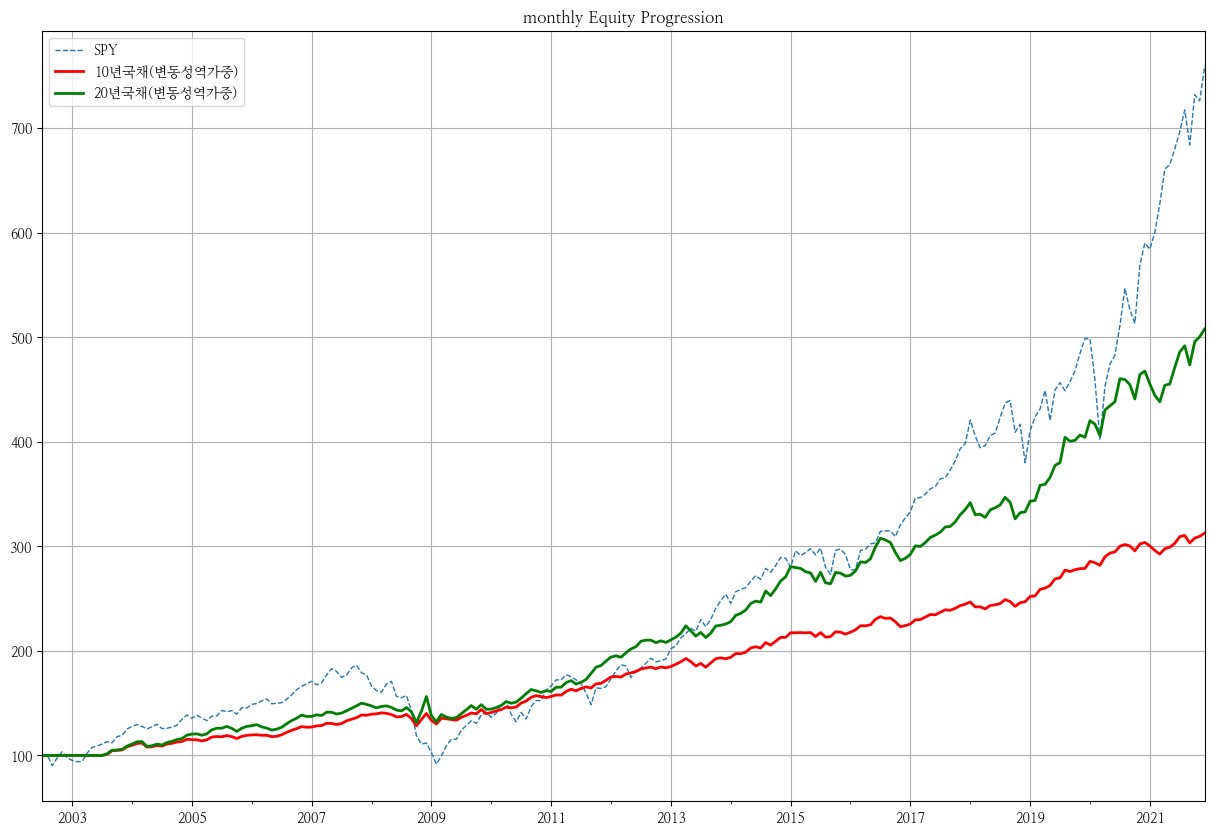

In [13]:
ax1 = r20_assets.plot(freq='M', ls='--', figsize=(15,10));
r10.plot(ax=ax1, freq='M', color='red', lw=2, figsize=(15, 10));
r20.plot(ax=ax1, freq='M', color='green', lw=2, figsize=(15, 10));

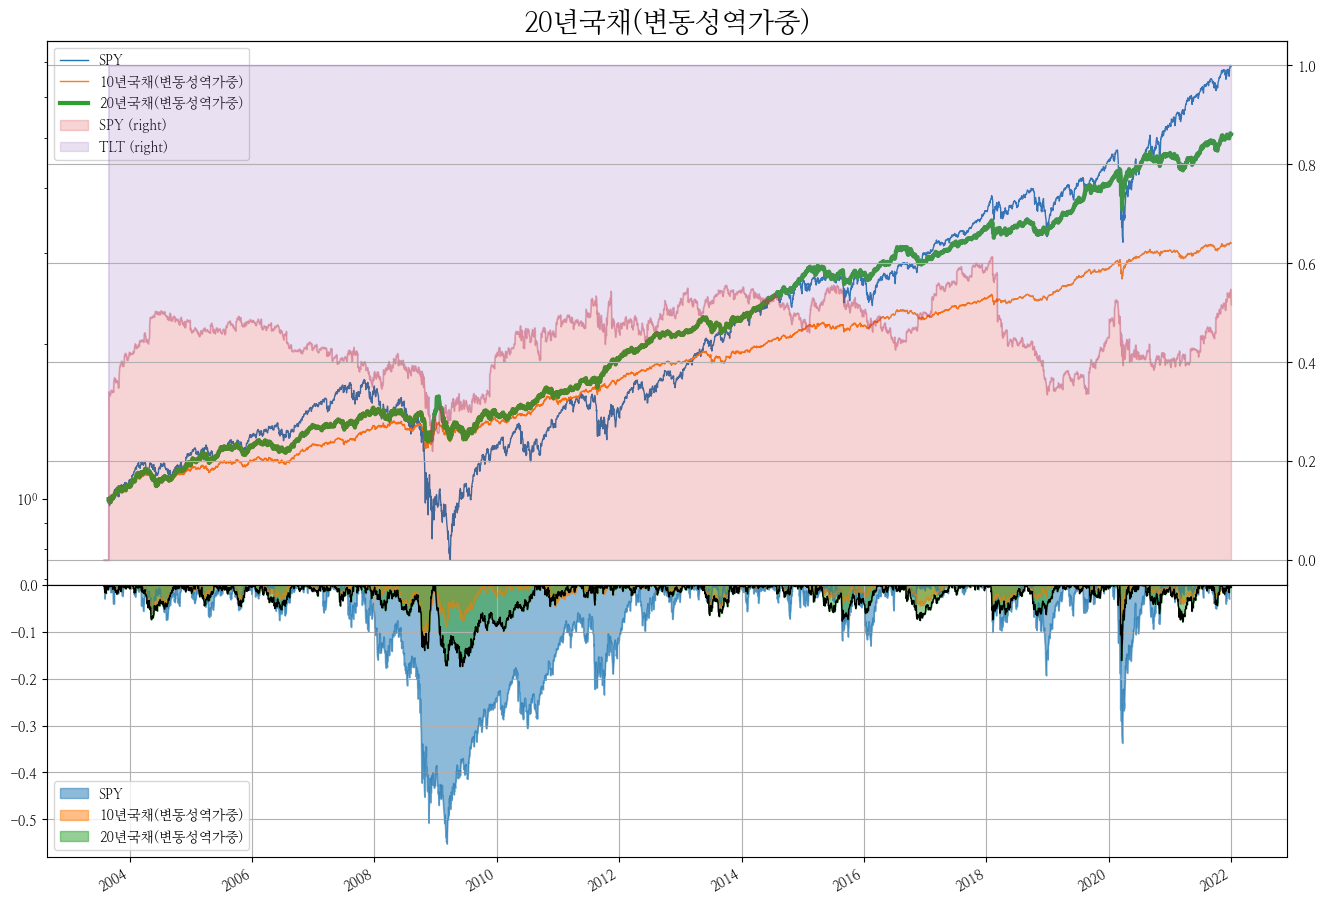

In [14]:
plot_assets(r_all, '2003-7', '2021', '20년국채(변동성역가중)')

In [15]:
r_all.prices[:'2017-6'].calc_stats().display()

Stat                 SPY         10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  ------------------------  ------------------------
Start                2003-07-30  2003-07-30                2003-07-30
End                  2017-06-30  2017-06-30                2017-06-30
Risk-free rate       0.00%       0.00%                     0.00%

Total Return         222.85%     134.50%                   210.65%
Daily Sharpe         0.55        1.16                      1.04
Daily Sortino        0.86        1.95                      1.73
CAGR                 8.78%       6.31%                     8.48%
Max Drawdown         -55.19%     -11.56%                   -17.45%
Calmar Ratio         0.16        0.55                      0.49

MTD                  0.64%       -0.10%                    0.71%
3m                   2.83%       2.06%                     3.62%
6m                   9.17%       4.61%                     7.69%
YTD                  9.17%       4.61%                     

In [16]:
class WeighInvVol(bt.Algo):
    """ 변동성에 반비례한 비중 할당.
    
    1. 최근 12개월간의 주식과 채권의 월간 수익률을 매달 각 각 구합니다(총 12개).
    2. 앞서 구한 12개의 월별 수익률의 표준편차를 계산합니다. 이것이 주식과 채권의 평균 변동성입니다.
    """
    def __init__(self, lookback=12, lag=pd.DateOffset(days=0)):
        super(WeighInvVol, self).__init__()
        self.lookback = lookback
        self.lag = lag

    def __call__(self, target):
        selected = target.temp['selected']

        # 2. 월말 리밸런싱 : 전달 말일기준으로 계산
        t0 = (target.now - pd.DateOffset(months=1)).strftime("%Y-%m")
        start = (target.now -  pd.DateOffset(months=self.lookback+1)).strftime("%Y-%m")

        prc = target.universe[selected].loc[start:t0].resample('M').last()
        print(f"\nprc : {target.now} ==> {t0} ~ {start}")#\n{prc}\n")

        '''
        vol = np.divide(1.0, np.std(returns, ddof=1))
        vol[np.isinf(vol)] = np.NaN
        volsum = vol.sum()
        return np.divide(vol, volsum)
        '''
        tw = bt.ffn.calc_inv_vol_weights(prc.to_returns().dropna())
        target.temp["weights"] = tw.dropna()

        return True

In [17]:
변동성역가중M = bt.Strategy('변동성역가중M',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        WeighInvVol(lookback=12, lag=pd.DateOffset(days=1)),
        bt.algos.PrintTempData(),
        bt.algos.Rebalance()

    ])
bt_invvol10_m = bt.Backtest(변동성역가중M, data[['SPY', 'IEF']], name='10년국채(변동성역가중)_M', initial_capital=100000000)
bt_invvol20_m = bt.Backtest(변동성역가중M, data[['SPY', 'TLT']], name='20년국채(변동성역가중)_M', initial_capital=100000000)


In [18]:
r10_m = bt.run(bt_invvol10_m)

2003-07-31 00:00:00

prc : 2003-07-31 00:00:00 ==> 2003-06 ~ 2002-06
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.273
IEF   0.727
dtype: float64}
2003-08-29 00:00:00

prc : 2003-08-29 00:00:00 ==> 2003-07 ~ 2002-07
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.327
IEF   0.673
dtype: float64}
2003-09-30 00:00:00

prc : 2003-09-30 00:00:00 ==> 2003-08 ~ 2002-08
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.321
IEF   0.679
dtype: float64}
2003-10-31 00:00:00

prc : 2003-10-31 00:00:00 ==> 2003-09 ~ 2002-09
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.390
IEF   0.610
dtype: float64}
2003-11-28 00:00:00

prc : 2003-11-28 00:00:00 ==> 2003-10 ~ 2002-10
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.408
IEF   0.592
dtype: float64}
2003-12-31 00:00:00

prc : 2003-12-31 00:00:00 ==> 2003-11 ~ 2002-11
{'selected': ['SPY', 'IEF'], 'weights': SPY   0.415
IEF   0.585
dtype: float64}
2004-01-30 00:00:00

prc : 2004-01-30 00:00:00 ==> 2003-12 ~ 2002-12
{'selected': ['SPY', 'IEF'], 'weights

In [19]:
r20_m = bt.run(bt_invvol20_m)

2003-07-31 00:00:00

prc : 2003-07-31 00:00:00 ==> 2003-06 ~ 2002-06
{'selected': ['SPY', 'TLT'], 'weights': SPY   0.365
TLT   0.635
dtype: float64}
2003-08-29 00:00:00

prc : 2003-08-29 00:00:00 ==> 2003-07 ~ 2002-07
{'selected': ['SPY', 'TLT'], 'weights': SPY   0.451
TLT   0.549
dtype: float64}
2003-09-30 00:00:00

prc : 2003-09-30 00:00:00 ==> 2003-08 ~ 2002-08
{'selected': ['SPY', 'TLT'], 'weights': SPY   0.436
TLT   0.564
dtype: float64}
2003-10-31 00:00:00

prc : 2003-10-31 00:00:00 ==> 2003-09 ~ 2002-09
{'selected': ['SPY', 'TLT'], 'weights': SPY   0.507
TLT   0.493
dtype: float64}
2003-11-28 00:00:00

prc : 2003-11-28 00:00:00 ==> 2003-10 ~ 2002-10
{'selected': ['SPY', 'TLT'], 'weights': SPY   0.523
TLT   0.477
dtype: float64}
2003-12-31 00:00:00

prc : 2003-12-31 00:00:00 ==> 2003-11 ~ 2002-11
{'selected': ['SPY', 'TLT'], 'weights': SPY   0.538
TLT   0.462
dtype: float64}
2004-01-30 00:00:00

prc : 2004-01-30 00:00:00 ==> 2003-12 ~ 2002-12
{'selected': ['SPY', 'TLT'], 'weights

In [20]:
r_all_m = bt.run(bt_spy, bt_invvol10_m, bt_invvol20_m, bt_invvol10, bt_invvol20)


In [21]:
r_all_m.set_date_range(start)
r_all_m.display()

Stat                 SPY         10년국채(변동성역가중)_M    20년국채(변동성역가중)_M    10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  --------------------------  --------------------------  ------------------------  ------------------------
Start                2003-07-30  2003-07-30                  2003-07-30                  2003-07-30                2003-07-30
End                  2022-01-28  2022-01-28                  2022-01-28                  2022-01-28                2022-01-28
Risk-free rate       0.00%       0.00%                       0.00%                       0.00%                     0.00%

Total Return         538.83%     216.58%                     414.75%                     201.71%                   381.26%
Daily Sharpe         0.63        1.09                        1.05                        1.15                      1.05
Daily Sortino        0.97        1.77                        1.69                        1.89                      1.69
CAGR                 

In [22]:
r_all_m.prices.resample('M').last().to_drawdown_series().describe()

,SPY,10년국채(변동성역가중)_M,20년국채(변동성역가중)_M,10년국채(변동성역가중),20년국채(변동성역가중)
count,223.000,223.000,223.000,223.000,223.000
mean,-0.060,-0.009,-0.016,-0.008,-0.018
std,0.104,0.018,0.025,0.014,0.029
min,-0.508,-0.121,-0.163,-0.088,-0.155
25%,-0.068,-0.011,-0.020,-0.011,-0.028
50%,-0.010,0.000,-0.003,-0.000,-0.005
75%,0.000,0.000,0.000,0.000,0.000
max,0.000,0.000,0.000,0.000,0.000


In [23]:
r_all_m.prices[:'2017-6'].calc_stats().display()

Stat                 SPY         10년국채(변동성역가중)_M    20년국채(변동성역가중)_M    10년국채(변동성역가중)    20년국채(변동성역가중)
-------------------  ----------  --------------------------  --------------------------  ------------------------  ------------------------
Start                2003-07-30  2003-07-30                  2003-07-30                  2003-07-30                2003-07-30
End                  2017-06-30  2017-06-30                  2017-06-30                  2017-06-30                2017-06-30
Risk-free rate       0.00%       0.00%                       0.00%                       0.00%                     0.00%

Total Return         222.85%     140.56%                     235.53%                     134.50%                   210.65%
Daily Sharpe         0.55        1.10                        1.07                        1.16                      1.04
Daily Sortino        0.86        1.84                        1.79                        1.95                      1.73
CAGR                 

In [24]:
r_all_m.prices[:'2017-6'].resample('M').last().to_drawdown_series().describe()

,SPY,10년국채(변동성역가중)_M,20년국채(변동성역가중)_M,10년국채(변동성역가중),20년국채(변동성역가중)
count,168.000,168.000,168.000,168.000,168.000
mean,-0.071,-0.010,-0.016,-0.008,-0.020
std,0.116,0.019,0.027,0.015,0.031
min,-0.508,-0.121,-0.163,-0.088,-0.155
25%,-0.087,-0.009,-0.019,-0.010,-0.029
50%,-0.014,-0.000,-0.003,-0.000,-0.006
75%,0.000,0.000,0.000,0.000,0.000
max,0.000,0.000,0.000,0.000,0.000


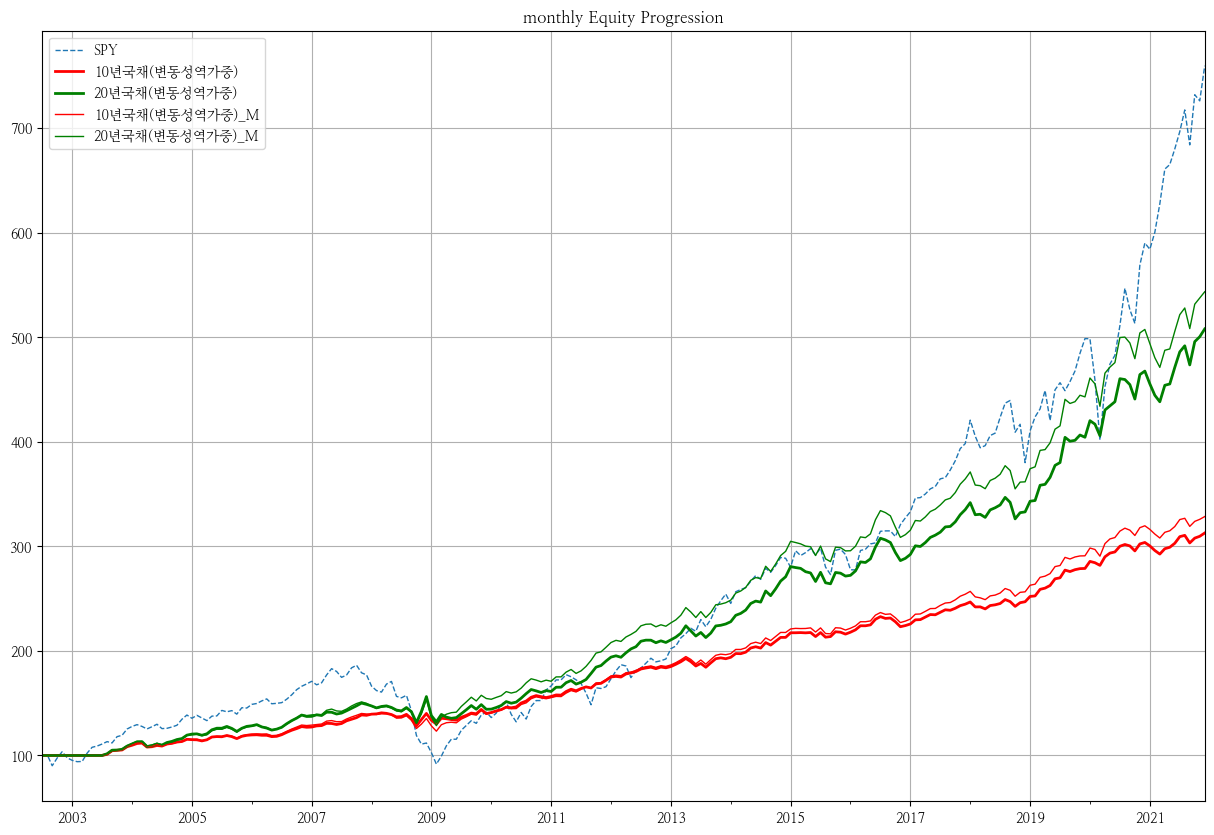

In [25]:
ax1 = r20_assets.plot(freq='M', ls='--', figsize=(15,10));
r10.plot(ax=ax1, freq='M', color='red', lw=2, figsize=(15, 10));
r20.plot(ax=ax1, freq='M', color='green', lw=2, figsize=(15, 10));
r10_m.plot(ax=ax1, freq='M', ls='-', color='red', lw=1, figsize=(15, 10));
r20_m.plot(ax=ax1, freq='M', ls='-', color='green', lw=1, figsize=(15, 10));

In [26]:
주식채권혼합전략 = bt.Strategy('1:1분산리밸런싱',
    [
        bt.algos.RunAfterDate(start),
        bt.algos.RunMonthly(run_on_end_of_period=True), #매월말
        bt.algos.PrintDate(),
        bt.algos.SelectAll(),
        bt.algos.WeighEqually(),
        bt.algos.Rebalance()
    ]
)
bt_test10 = bt.Backtest(주식채권혼합전략, data[['SPY', 'IEF']], name='10년국채(동일비중))', initial_capital=100000000)
bt_test20 = bt.Backtest(주식채권혼합전략, data[['SPY', 'TLT']], name='20년국채(동일비중)', initial_capital=100000000)


In [27]:
r10_ew = bt.run(bt_test10)

2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-31 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-28 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-31 00:00:00
2005-01-31 00:00:00
2005-02-28 00:00:00
2005-03-31 00:00:00
2005-04-29 00:00:00
2005-05-31 00:00:00
2005-06-30 00:00:00
2005-07-29 00:00:00
2005-08-31 00:00:00
2005-09-30 00:00:00
2005-10-31 00:00:00
2005-11-30 00:00:00
2005-12-30 00:00:00
2006-01-31 00:00:00
2006-02-28 00:00:00
2006-03-31 00:00:00
2006-04-28 00:00:00
2006-05-31 00:00:00
2006-06-30 00:00:00
2006-07-31 00:00:00
2006-08-31 00:00:00
2006-09-29 00:00:00
2006-10-31 00:00:00
2006-11-30 00:00:00
2006-12-29 00:00:00
2007-01-31 00:00:00
2007-02-28 00:00:00
2007-03-30 00:00:00
2007-04-30 00:00:00
2007-05-31 00:00:00
2007-06-29 00:00:00
2007-07-31 00:00:00
2007-08-31 00:00:00


In [28]:
r20_ew = bt.run(bt_test20)

2003-07-31 00:00:00
2003-08-29 00:00:00
2003-09-30 00:00:00
2003-10-31 00:00:00
2003-11-28 00:00:00
2003-12-31 00:00:00
2004-01-30 00:00:00
2004-02-27 00:00:00
2004-03-31 00:00:00
2004-04-30 00:00:00
2004-05-28 00:00:00
2004-06-30 00:00:00
2004-07-30 00:00:00
2004-08-31 00:00:00
2004-09-30 00:00:00
2004-10-29 00:00:00
2004-11-30 00:00:00
2004-12-31 00:00:00
2005-01-31 00:00:00
2005-02-28 00:00:00
2005-03-31 00:00:00
2005-04-29 00:00:00
2005-05-31 00:00:00
2005-06-30 00:00:00
2005-07-29 00:00:00
2005-08-31 00:00:00
2005-09-30 00:00:00
2005-10-31 00:00:00
2005-11-30 00:00:00
2005-12-30 00:00:00
2006-01-31 00:00:00
2006-02-28 00:00:00
2006-03-31 00:00:00
2006-04-28 00:00:00
2006-05-31 00:00:00
2006-06-30 00:00:00
2006-07-31 00:00:00
2006-08-31 00:00:00
2006-09-29 00:00:00
2006-10-31 00:00:00
2006-11-30 00:00:00
2006-12-29 00:00:00
2007-01-31 00:00:00
2007-02-28 00:00:00
2007-03-30 00:00:00
2007-04-30 00:00:00
2007-05-31 00:00:00
2007-06-29 00:00:00
2007-07-31 00:00:00
2007-08-31 00:00:00


In [29]:
r00 = bt.run(bt_spy, bt_invvol10_m, bt_invvol20_m, bt_invvol10, bt_invvol20, bt_test10, bt_test20)

In [30]:
r00.set_date_range(start)
r00.display()


Stat                 SPY         10년국채(변동성역가중)_M    20년국채(변동성역가중)_M    10년국채(변동성역가중)    20년국채(변동성역가중)    10년국채(동일비중))    20년국채(동일비중)
-------------------  ----------  --------------------------  --------------------------  ------------------------  ------------------------  ---------------------  --------------------
Start                2003-07-30  2003-07-30                  2003-07-30                  2003-07-30                2003-07-30                2003-07-30             2003-07-30
End                  2022-01-28  2022-01-28                  2022-01-28                  2022-01-28                2022-01-28                2022-01-28             2022-01-28
Risk-free rate       0.00%       0.00%                       0.00%                       0.00%                     0.00%                     0.00%                  0.00%

Total Return         538.83%     216.58%                     414.75%                     201.71%                   381.26%                   307.07%             

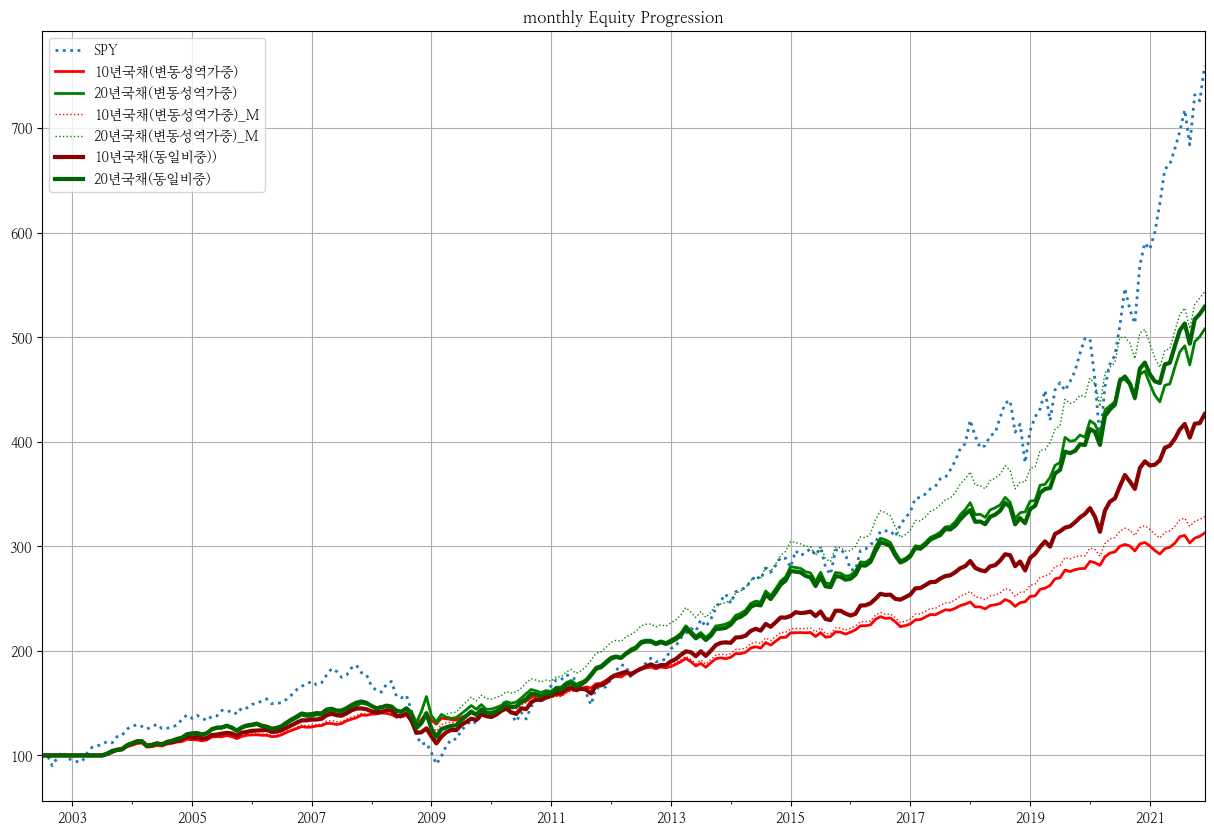

In [31]:
ax1 = r20_assets.plot(freq='M', ls=':', lw=2, figsize=(15,10));
r10.plot(ax=ax1, freq='M', color='red', lw=2, figsize=(15, 10));
r20.plot(ax=ax1, freq='M', color='green', lw=2, figsize=(15, 10));
r10_m.plot(ax=ax1, freq='M', ls=':', color='red', lw=1, figsize=(15, 10));
r20_m.plot(ax=ax1, freq='M', ls=':', color='green', lw=1, figsize=(15, 10));
r10_ew.plot(ax=ax1, freq='M', ls='-', color='darkred', lw=3, figsize=(15, 10));
r20_ew.plot(ax=ax1, freq='M', ls='-', color='darkgreen', lw=3, figsize=(15, 10));

In [32]:
r00.stats

,SPY,10년국채(변동성역가중)_M,20년국채(변동성역가중)_M,10년국채(변동성역가중),20년국채(변동성역가중),10년국채(동일비중)),20년국채(동일비중)
start,2003-07-30 00:00:00,2003-07-30 00:00:00,2003-07-30 00:00:00,2003-07-30 00:00:00,2003-07-30 00:00:00,2003-07-30 00:00:00,2003-07-30 00:00:00
end,2022-01-28 00:00:00,2022-01-28 00:00:00,2022-01-28 00:00:00,2022-01-28 00:00:00,2022-01-28 00:00:00,2022-01-28 00:00:00,2022-01-28 00:00:00
rf,0.000,0.000,0.000,0.000,0.000,0.000,0.000
total_return,5.388,2.166,4.147,2.017,3.813,3.071,4.016
cagr,0.105,0.064,0.093,0.062,0.089,0.079,0.091
max_drawdown,-0.552,-0.145,-0.200,-0.116,-0.174,-0.261,-0.247
calmar,0.191,0.443,0.462,0.532,0.508,0.302,0.369
mtd,-0.070,-0.036,-0.053,-0.035,-0.052,-0.045,-0.052
three_month,-0.032,-0.022,-0.029,-0.019,-0.027,-0.023,-0.028
six_month,0.014,-0.028,-0.014,-0.025,-0.010,-0.012,-0.010
